## Problem Statement

    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
- You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Model Building

- In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


### Model Evaluation:
- When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to `calculate the R-squared score` on the test set.

 

*from sklearn.metrics import r2_score* <br>
*r2_score(y_test, y_pred)*
 

- where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
- Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

# Solution
- Steps:
    1. Read, understanding and visualizing dataset
    2. Preparing data for modelling (train-test split, scaling)
    3. Training the data
    4. Residual Analysis
    5. Predictions and evaluation on the data set



## Step 1- Reading, understanding and Visualizing data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data set
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


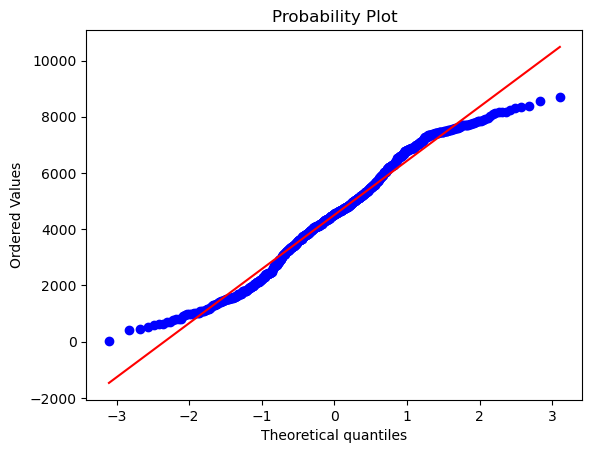

In [3]:
#Q-Q plot for count variable
import scipy.stats as stats
import pylab

stats.probplot(bikes['cnt'], dist="norm", plot=pylab)
pylab.show()

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Drop dteday column from data frame, as its there in year and month column
bikes.drop('dteday', axis=1, inplace=True)
bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Drop instant column as it has index
bikes.drop('instant', axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Drop casual and registered columns as its sum is in the cnt
bikes.drop(['casual', 'registered'],inplace=True, axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


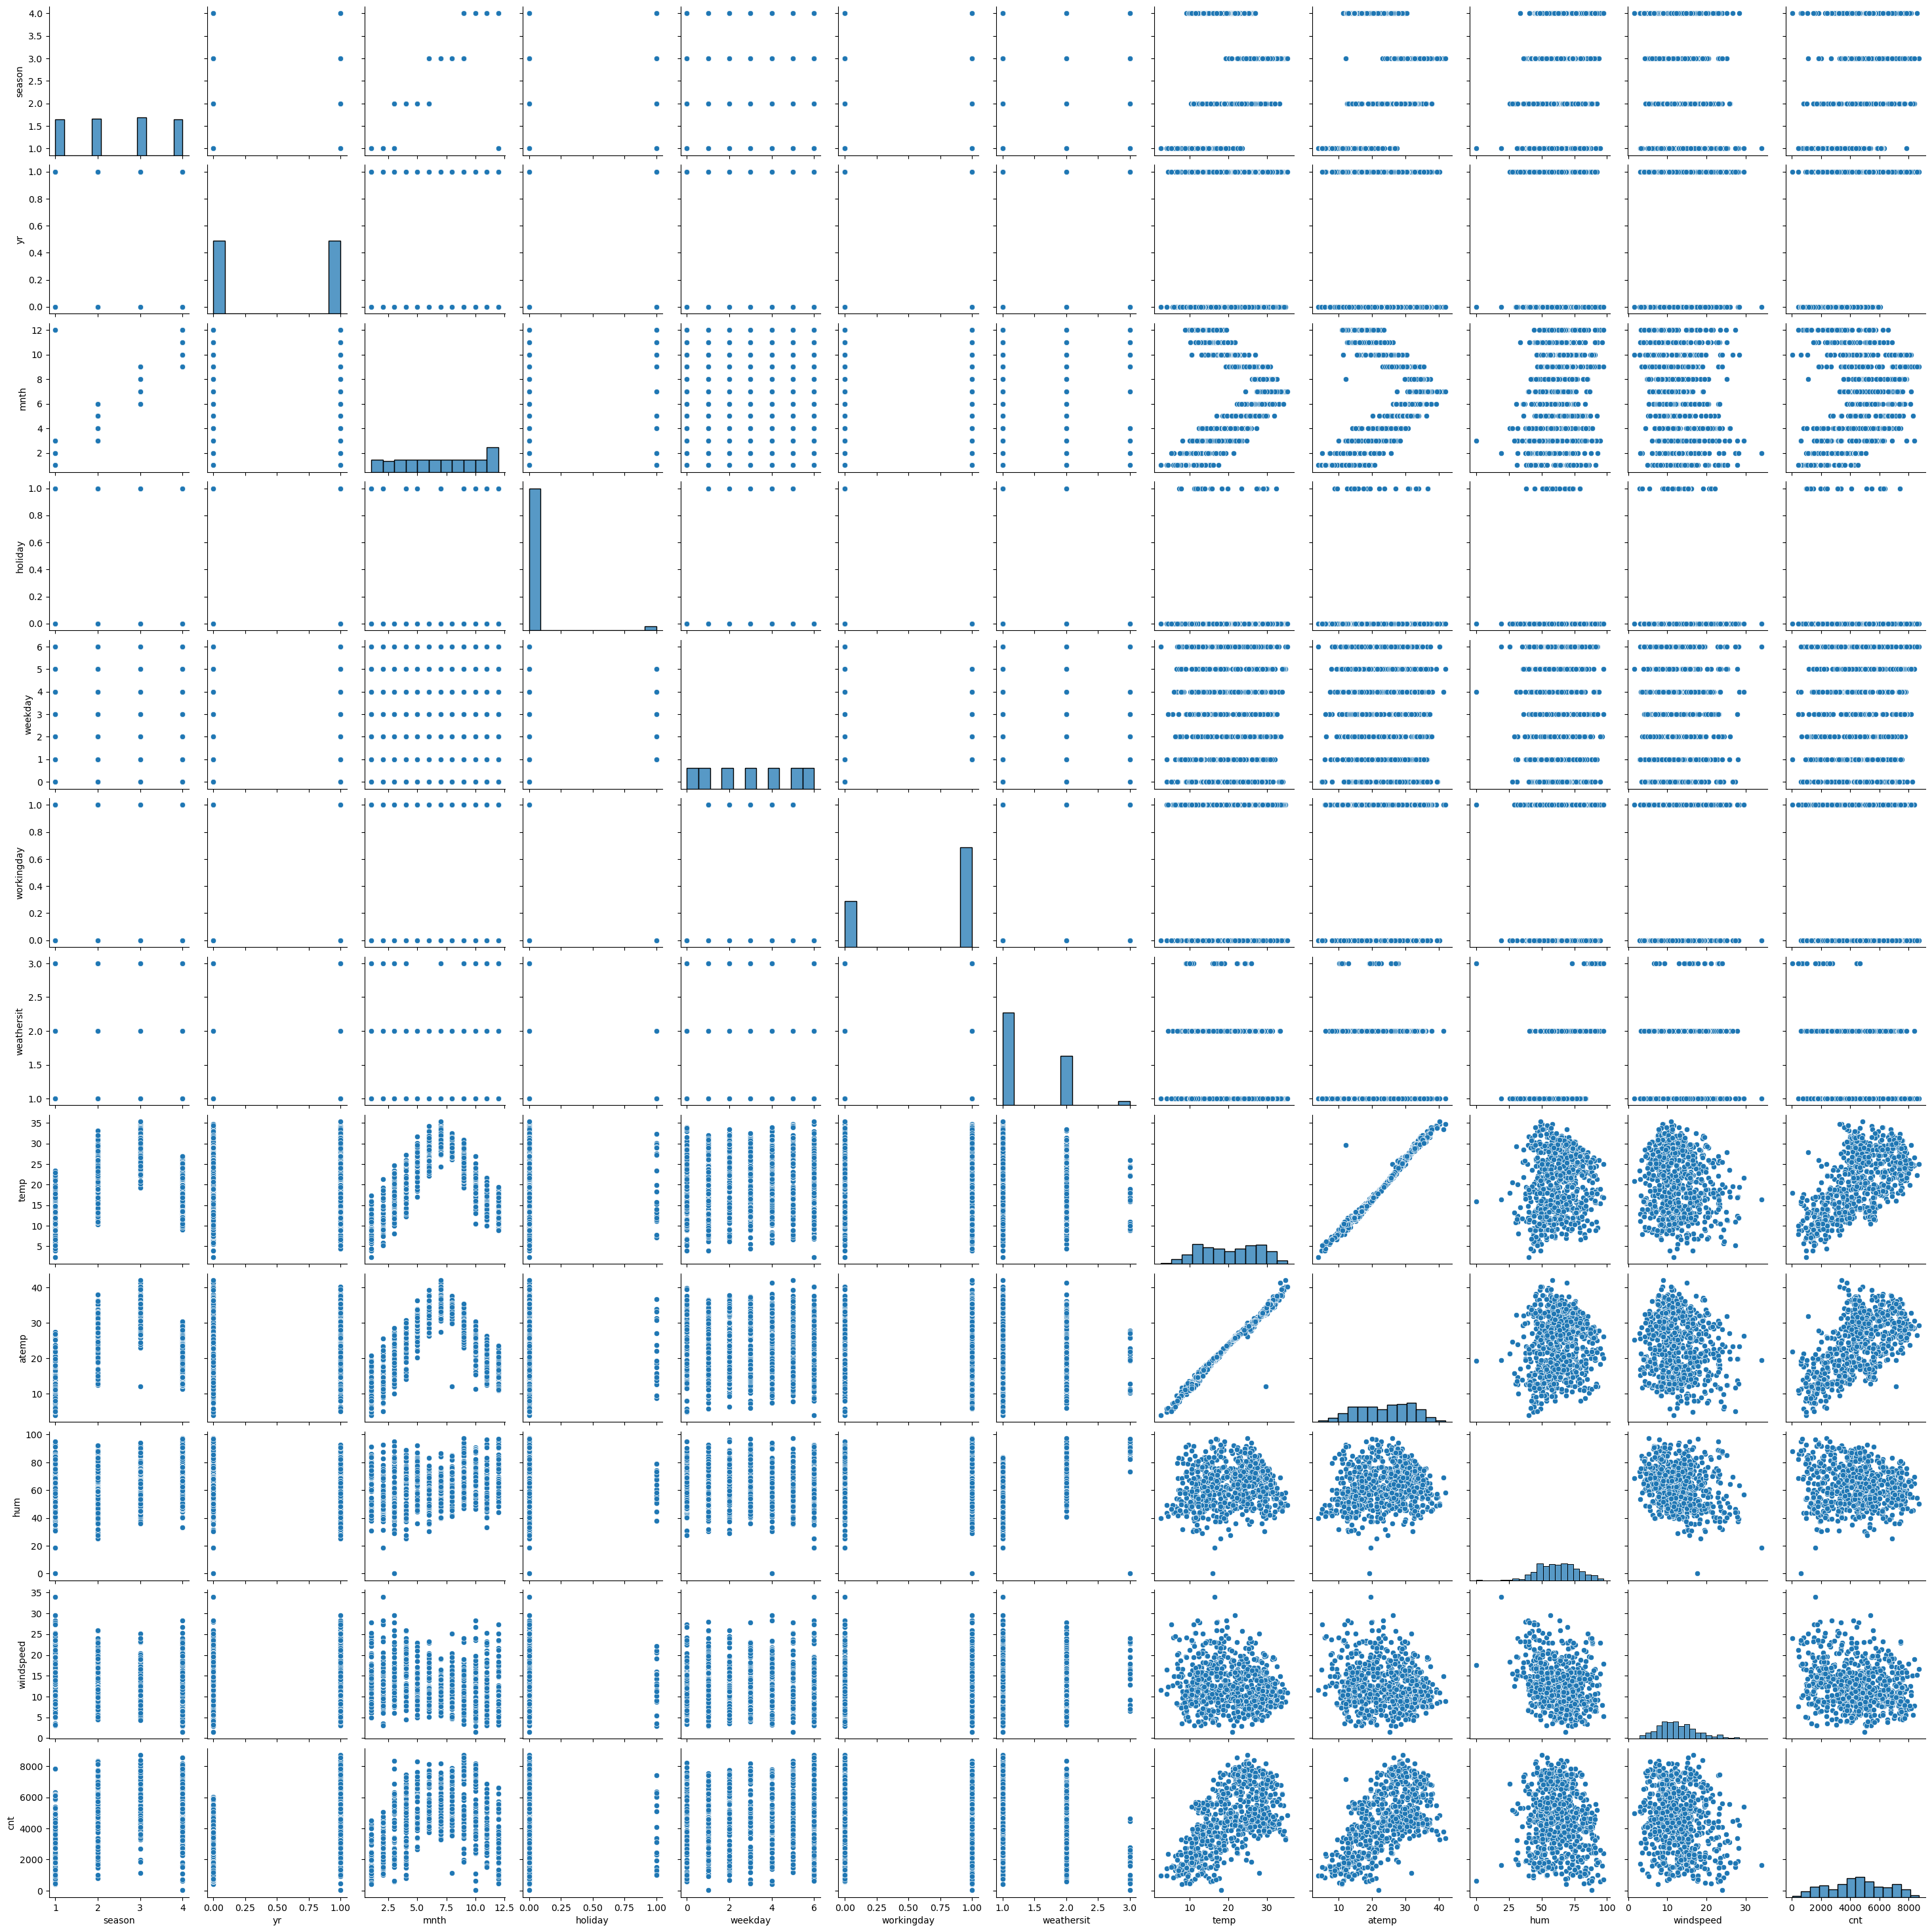

In [9]:
# Visualizing numerical dataset
sns.pairplot(bikes)
plt.show()

**Conclusion-**
1. There is clear relationship between count and temperature, 
2. There is clear relationship between count and season.
3. There is clear relationship between count and year and mnth.
- `So we can build Linear Regression model`

In [10]:
# Rename months in the mnth column
bikes['mnth'] = bikes['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Rename weekday in the mnth column
bikes['weekday'] = bikes['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


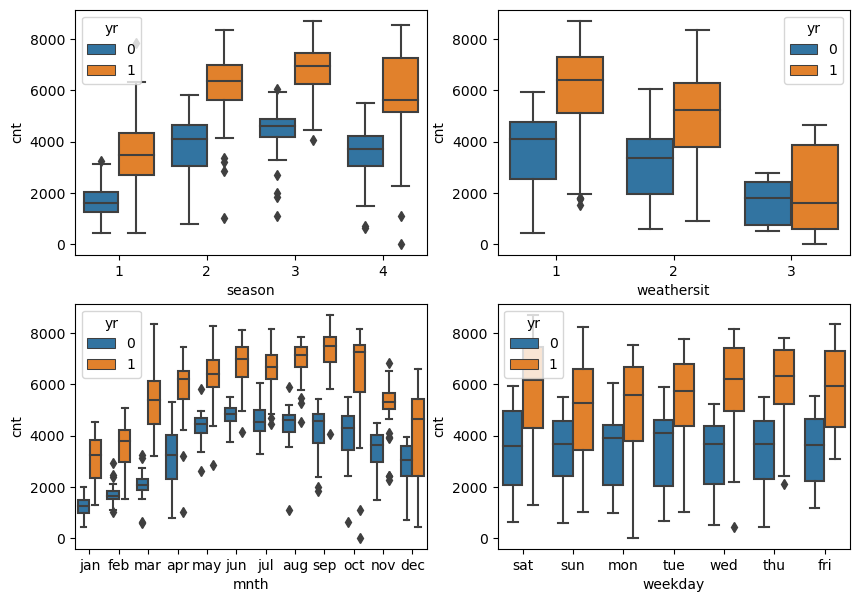

In [12]:
## Box plot for cnt and weathersit and season
plt.figure(figsize=[10,7])
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=bikes, hue='yr')
#sns.boxplot(x='season', y='cnt', data=bikes)
plt.subplot(2,2,2)
sns.boxplot(x='weathersit', y='cnt', data=bikes, hue='yr')
#sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.subplot(2,2,3)
sns.boxplot(x='mnth', y='cnt', data=bikes, hue='yr')
#sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.subplot(2,2,4)
sns.boxplot(x='weekday', y='cnt', data=bikes, hue='yr')
#sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.show()

**Conclusion-**
1. There are more users in Summer and Fall season which can be seen from month data as well
2. Bikes are used more when the weather is clear and less in light Rain/snow
3. Users are almost same whether its weekday or weekend,

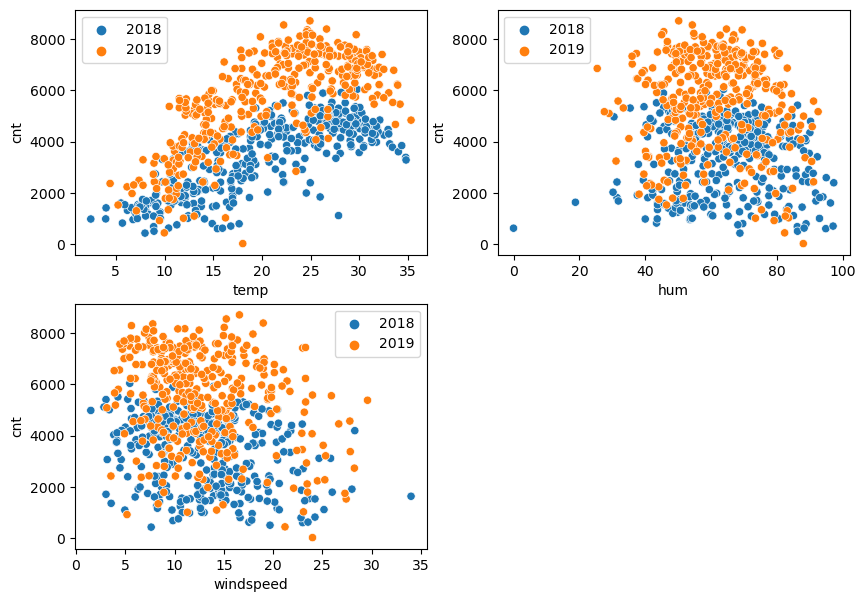

In [20]:
def pltLegend():
    L=plt.legend()
    L.get_texts()[0].set_text('2018')
    L.get_texts()[1].set_text('2019')
## Box plot for cnt and weathersit and season
plt.figure(figsize=[10,7])
plt.subplot(2,2,1)
sns.scatterplot(x='temp', y='cnt', data=bikes, hue='yr')
pltLegend()
#sns.boxplot(x='temp', y='cnt', data=bikes)
plt.subplot(2,2,2)
sns.scatterplot(x='hum', y='cnt', data=bikes, hue='yr')
pltLegend()
#sns.boxplot(x='hum', y='cnt', data=bikes)
plt.subplot(2,2,3)
sns.scatterplot(x='windspeed', y='cnt', data=bikes, hue='yr')
pltLegend()
#sns.boxplot(x='windspeed', y='cnt', data=bikes)
plt.show()

**Conclusion-**
1. There is continous increase in ridership from 2018 to 2019
2. With increase in temperature there is linear increase in ridership
3. When humidity is optimal i.e. 50-80, more people tend to rent bike
4. Lower windsped is directly related to more ridership

In [21]:
## Create dummy variable for mnth
mnth_dummy = pd.get_dummies(bikes['mnth'], dtype=int, drop_first=True)
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
## Create dummy variable for weekday
weekday_dummy = pd.get_dummies(bikes['weekday'], dtype=int, drop_first=True)
weekday_dummy.head(7)

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0
6,0,0,0,0,0,0


In [23]:
## Create dummy variable for weathersit
weathersit_dummy = pd.get_dummies(bikes['weathersit'], dtype=int, drop_first=True)
weathersit_dummy.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [24]:
# Rename Columns of weathersit dummy variables for better understanding
weathersit_dummy.rename(columns={2:"Pleasant", 3:"Light"}, inplace=True)
weathersit_dummy.head()

,Pleasant,Light
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [25]:
## Create dummy variable for season
season_dummy = pd.get_dummies(bikes['season'], dtype=int, drop_first=True)
season_dummy.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [26]:
# Rename Columns of season dummy variables for better understanding
season_dummy.rename(columns={2:"summer", 3:"fall", 4:"winter"}, inplace=True)
season_dummy.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
# Merge the dummy variables to original Data set
bikes = pd.concat([bikes, weathersit_dummy, season_dummy, mnth_dummy, weekday_dummy], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,1,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,1,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,1,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,1,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#Drop weathersit, season, mnth and weekday columns
bikes = bikes.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Pleasant,Light,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Check the shape
bikes.shape

(730, 30)

In [30]:
# Check bikes data
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Pleasant,Light,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.336986,0.028767,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.473004,0.167266,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


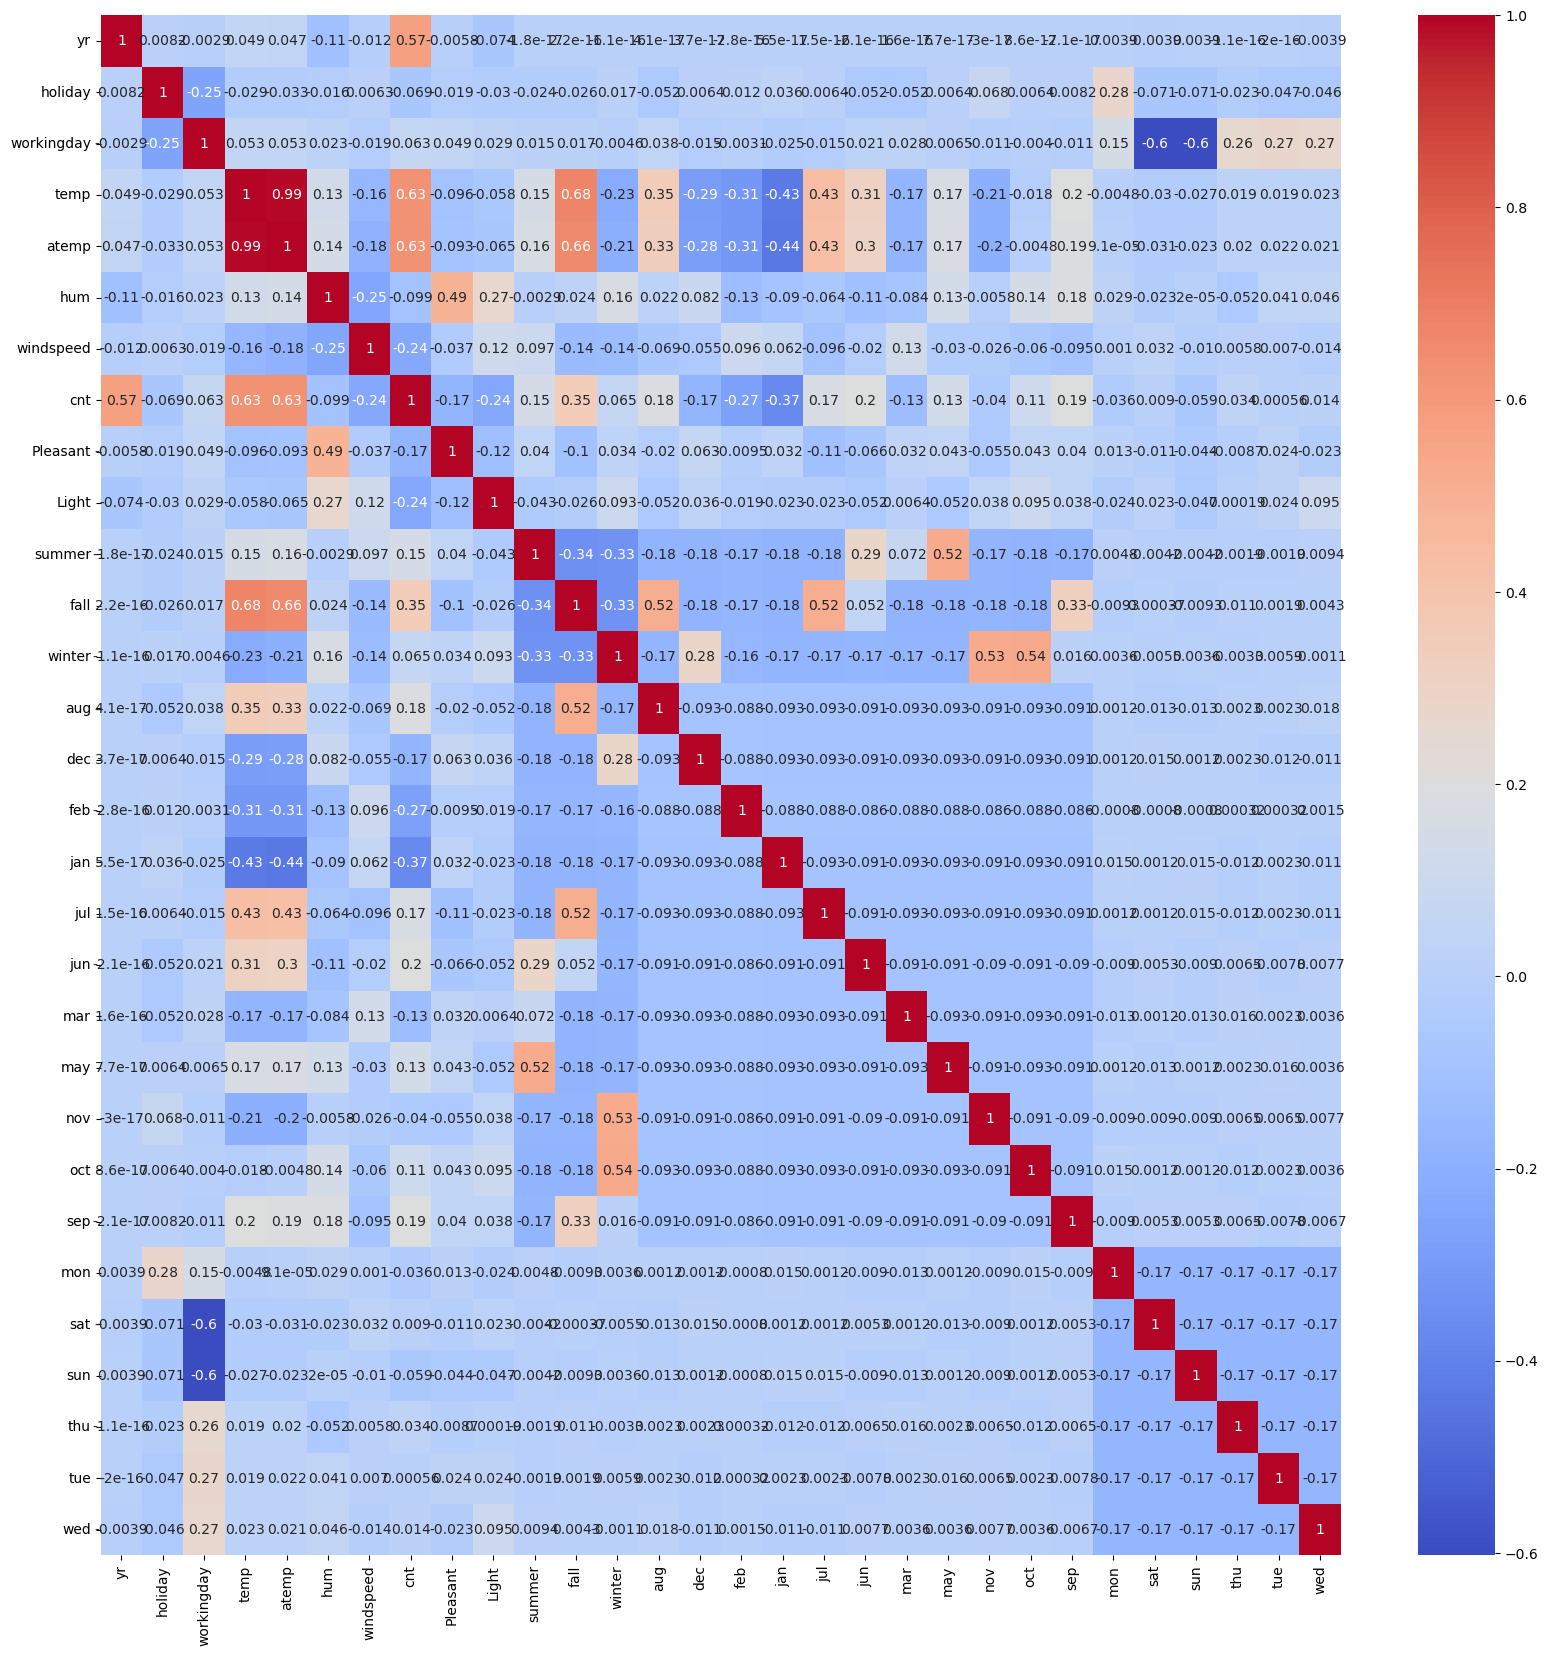

In [31]:
plt.figure(figsize=[20,20])
sns.heatmap(bikes.corr(), annot=True, cmap='coolwarm')
plt.show()

**Conclusion-**
1. There is strong positive co-relation between count and Temp and year
2. There is strong negative  co-relation between count and month Jan and Feb

## Step 2a- Splitting the data into train and test set

In [32]:
# Split data into 70:30 ratio for training and testing
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the data

`Rescale using MinMax`

In [33]:
# Create scaler object
scaler = MinMaxScaler()

In [34]:
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Pleasant,Light,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.336986,0.028767,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.473004,0.167266,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Apply scaler to all the columns except Yes/No i.e. Columns with only values as 0 and 1 
# we can exclude all the dummy variables as well with other columns

# create list of variables to be transformed
scaler_column = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Scale fit the above columns
df_train[scaler_column] = scaler.fit_transform(df_train[scaler_column])

In [36]:
# Check the scaled data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Pleasant,Light,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Verify scaled data
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Pleasant,Light,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.345098,0.029412,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.475867,0.169124,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Divide the training data into X_train and y_train

In [38]:
# Create X_train and y_train data
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [40]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Pleasant,Light,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 3 -  Build model using RFE

In [41]:
# Build model using RFE
lm = LinearRegression()

# fit the model
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
#rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [42]:
# Check the features and its ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Pleasant', True, 1),
 ('Light', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 10),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 14),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 15)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Pleasant',
       'Light', 'summer', 'fall', 'winter', 'jan', 'jul', 'sep', 'sat'],
      dtype='object')

## Building model using statsmodel for statistical analysis

In [44]:
def calcVIF(df):
    vif = pd.DataFrame()
    vif['features']=df.columns
    vif['VIF']= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending=False, inplace=True)
    return(vif)

In [45]:
# Create data with selected features by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,Pleasant,Light,summer,fall,winter,jan,jul,sep,sat
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0,0


In [46]:
#Calculate VIF
calcVIF(X_train_rfe)

,features,VIF
3,temp,24.84
4,hum,20.35
9,fall,7.26
2,workingday,5.10
5,windspeed,3.89
8,summer,3.64
10,winter,2.89
6,Pleasant,2.15
0,yr,2.06
14,sat,1.92


In [47]:
# Add constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Pleasant,Light,summer,fall,winter,jan,jul,sep,sat
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0,0


In [48]:
# Running linear regression model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        09:36:59   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2010      0.030      6.770      0.000       0.143       0.259
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Pleasant      -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Light         -0.2475      0.026     -9.507      0.000      -0.299      -0.196
summer         0.1017      0.015      6.727      0.000       0.072       0.131
fall           0.0509      0.021      2.464      0.014       0.010       0.091
winter         0.1442      0.014     10.619      0.000       0.118       0.171
jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
jul           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep            0.0814      0.016      4.945      0.000       0.049       0.114
sat            0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Check Variance
# drop contant before checking variance
X_train_ml1 = X_train_rfe.drop('const', axis=1)

calcVIF(X_train_ml1)


,features,VIF
3,temp,24.84
4,hum,20.35
9,fall,7.26
2,workingday,5.10
5,windspeed,3.89
8,summer,3.64
10,winter,2.89
6,Pleasant,2.15
0,yr,2.06
14,sat,1.92


In [51]:
# Drop temp as it has high VIF
X_train_rfe2 = X_train_rfe.drop('temp', axis=1)


In [52]:
# Build 2nd model after dropping temp
# Add constant
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,hum,windspeed,Pleasant,Light,summer,fall,winter,jan,jul,sep,sat
576,1.0,1,0,1,0.725633,0.264686,0,0,0,1,0,0,1,0,0
426,1.0,1,0,0,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.504508,0.188475,1,0,1,0,0,0,0,0,1
111,1.0,0,0,1,0.751824,0.380981,1,0,1,0,0,0,0,0,0


In [53]:
# Running linear regression model
lm2 = sm.OLS(y_train, X_train_rfe2).fit()

In [54]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          7.36e-153
Time:                        09:36:59   Log-Likelihood:                 425.67
No. Observations:                 510   AIC:                            -821.3
Df Residuals:                     495   BIC:                            -757.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2921      0.035      8.373      0.000       0.224       0.361
yr             0.2476      0.010     26.014      0.000       0.229       0.266
holiday       -0.0569      0.032     -1.761      0.079      -0.120       0.007
workingday     0.0476      0.014      3.440      0.001       0.020       0.075
hum           -0.0123      0.043     -0.284      0.776      -0.097       0.073
windspeed     -0.1904      0.031     -6.220      0.000      -0.250      -0.130
Pleasant      -0.0862      0.012     -7.070      0.000      -0.110      -0.062
Light         -0.3001      0.031     -9.688      0.000      -0.361      -0.239
summer         0.2180      0.016     14.047      0.000       0.188       0.248
fall           0.2607      0.018     14.419      0.000       0.225       0.296
winter         0.1848      0.016     11.565      0.000       0.153       0.216
jan           -0.1027      0.020     -5.109      0.000      -0.142      -0.063
jul           -0.0097      0.021     -0.453      0.651      -0.052       0.032
sep            0.0715      0.020      3.618      0.000       0.033       0.110
sat            0.0559      0.017      3.208      0.001       0.022       0.090
==============================================================================
Omnibus:                       34.568   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.537
Skew:                          -0.420   Prob(JB):                     3.56e-15
Kurtosis:                       4.558   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Check Variance
# drop contant before checking variance
X_train_ml2 = X_train_rfe2.drop('const', axis=1)
calcVIF(X_train_ml2)

,features,VIF
3,hum,13.48
2,workingday,5.04
4,windspeed,3.83
8,fall,3.70
9,winter,2.73
7,summer,2.57
0,yr,1.99
5,Pleasant,1.98
13,sat,1.91
11,jul,1.57


In [56]:
# humidity has high VIF, drop humidity for next model
X_train_rfe3 = X_train_rfe2.drop('hum', axis=1)

In [57]:
# Build 3rd linear regression model
X_train_rfe3 = sm.add_constant(X_train_rfe3)
X_train_rfe3.head()

,const,yr,holiday,workingday,windspeed,Pleasant,Light,summer,fall,winter,jan,jul,sep,sat
576,1.0,1,0,1,0.264686,0,0,0,1,0,0,1,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.188475,1,0,1,0,0,0,0,0,1
111,1.0,0,0,1,0.380981,1,0,1,0,0,0,0,0,0


In [58]:
# Run linear regression model
lm3 = sm.OLS(y_train, X_train_rfe3).fit()

In [59]:
# Check statistics
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          6.44e-154
Time:                        09:36:59   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2842      0.021     13.570      0.000       0.243       0.325
yr             0.2478      0.009     26.153      0.000       0.229       0.266
holiday       -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday     0.0478      0.014      3.466      0.001       0.021       0.075
windspeed     -0.1878      0.029     -6.426      0.000      -0.245      -0.130
Pleasant      -0.0882      0.010     -8.688      0.000      -0.108      -0.068
Light         -0.3034      0.029    -10.593      0.000      -0.360      -0.247
summer         0.2175      0.015     14.116      0.000       0.187       0.248
fall           0.2602      0.018     14.483      0.000       0.225       0.296
winter         0.1840      0.016     11.690      0.000       0.153       0.215
jan           -0.1026      0.020     -5.112      0.000      -0.142      -0.063
jul           -0.0095      0.021     -0.446      0.656      -0.052       0.032
sep            0.0710      0.020      3.610      0.000       0.032       0.110
sat            0.0562      0.017      3.243      0.001       0.022       0.090
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_train_rfe3.drop('const', axis=1, inplace=True)

In [61]:
# Check VIF

calcVIF(X_train_rfe3)

,features,VIF
2,workingday,4.17
3,windspeed,3.48
7,fall,2.95
6,summer,2.04
0,yr,1.96
8,winter,1.92
12,sat,1.74
4,Pleasant,1.57
10,jul,1.57
11,sep,1.40


In [62]:
# All VIFs are good, but the feature jul has high p-value.
# Lets drop jul and check if model improves
X_train_rfe4 = X_train_rfe3.drop('jul', axis=1)
X_train_rfe4.head()

,yr,holiday,workingday,windspeed,Pleasant,Light,summer,fall,winter,jan,sep,sat
576,1,0,1,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,0,0,0,1
728,1,0,0,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.188475,1,0,1,0,0,0,0,1
111,0,0,1,0.380981,1,0,1,0,0,0,0,0


In [63]:
# Lets build 4th linear model with dropped feature 'jul'
# Add constant
X_train_rfe4 = sm.add_constant(X_train_rfe4)
X_train_rfe4.head()

,const,yr,holiday,workingday,windspeed,Pleasant,Light,summer,fall,winter,jan,sep,sat
576,1.0,1,0,1,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,0,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.188475,1,0,1,0,0,0,0,1
111,1.0,0,0,1,0.380981,1,0,1,0,0,0,0,0


In [64]:
# Run linear regression model
lm4 = sm.OLS(y_train, X_train_rfe4).fit()

In [65]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          5.73e-155
Time:                        09:36:59   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2838      0.021     13.574      0.000       0.243       0.325
yr             0.2478      0.009     26.179      0.000       0.229       0.266
holiday       -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday     0.0481      0.014      3.489      0.001       0.021       0.075
windspeed     -0.1877      0.029     -6.429      0.000      -0.245      -0.130
Pleasant      -0.0879      0.010     -8.685      0.000      -0.108      -0.068
Light         -0.3035      0.029    -10.606      0.000      -0.360      -0.247
summer         0.2175      0.015     14.126      0.000       0.187       0.248
fall           0.2568      0.016     15.797      0.000       0.225       0.289
winter         0.1838      0.016     11.692      0.000       0.153       0.215
jan           -0.1027      0.020     -5.118      0.000      -0.142      -0.063
sep            0.0737      0.019      3.933      0.000       0.037       0.111
sat            0.0564      0.017      3.254      0.001       0.022       0.090
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#Check VIF
X_train_rfe4.drop('const', axis=1, inplace=True)
calcVIF(X_train_rfe4)

,features,VIF
2,workingday,4.17
3,windspeed,3.48
7,fall,2.21
6,summer,2.04
0,yr,1.96
8,winter,1.92
11,sat,1.74
4,Pleasant,1.56
9,jan,1.36
10,sep,1.27


In [67]:
# holiday has high p-value, drop holiday and check if there is any improvement
X_train_rfe5 = X_train_rfe4.drop('holiday', axis=1)
X_train_rfe5.head()

,yr,workingday,windspeed,Pleasant,Light,summer,fall,winter,jan,sep,sat
576,1,1,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,0,0,1
728,1,0,0.663106,0,0,0,0,0,0,0,0
482,1,0,0.188475,1,0,1,0,0,0,0,1
111,0,1,0.380981,1,0,1,0,0,0,0,0


In [68]:
# Check VIF
calcVIF(X_train_rfe5)

,features,VIF
1,workingday,3.88
2,windspeed,3.36
6,fall,2.18
5,summer,2.02
0,yr,1.96
7,winter,1.87
10,sat,1.67
3,Pleasant,1.56
8,jan,1.34
9,sep,1.26


In [69]:
# Create 5th model without holiday
#Add constant
X_train_rfe5 = sm.add_constant(X_train_rfe5)
X_train_rfe5.head()

,const,yr,workingday,windspeed,Pleasant,Light,summer,fall,winter,jan,sep,sat
576,1.0,1,1,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.188475,1,0,1,0,0,0,0,1
111,1.0,0,1,0.380981,1,0,1,0,0,0,0,0


In [70]:
# Create linear model
lm5 = sm.OLS(y_train, X_train_rfe5).fit()

In [71]:
# Check statistics of linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          2.01e-155
Time:                        09:36:59   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2751      0.020     13.523      0.000       0.235       0.315
yr             0.2480      0.009     26.146      0.000       0.229       0.267
workingday     0.0564      0.013      4.353      0.000       0.031       0.082
windspeed     -0.1887      0.029     -6.450      0.000      -0.246      -0.131
Pleasant      -0.0874      0.010     -8.623      0.000      -0.107      -0.067
Light         -0.3023      0.029    -10.546      0.000      -0.359      -0.246
summer         0.2187      0.015     14.191      0.000       0.188       0.249
fall           0.2581      0.016     15.860      0.000       0.226       0.290
winter         0.1838      0.016     11.669      0.000       0.153       0.215
jan           -0.1033      0.020     -5.138      0.000      -0.143      -0.064
sep            0.0715      0.019      3.815      0.000       0.035       0.108
sat            0.0648      0.017      3.887      0.000       0.032       0.098
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion-**
- We can see that all the VIFs are less than 5 and p-value is also low.
- Also F-statistic is 159.7 is high and Prob (F-statistic) is 2.01e-155, which is almost 0.
- This satisfies all the criteria for model selection
- We can take lm5 as final model

## Step 4 - Residual analysis of the model

In [72]:
y_train_pred = lm5.predict(X_train_rfe5)

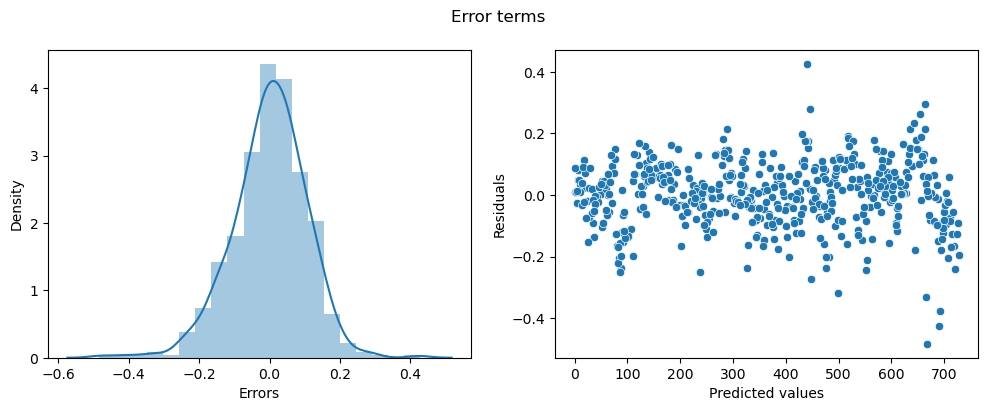

In [94]:
# Plot graph for reidual
#Calculate residuals
res = y_train - y_train_pred

# Plot distribution graph
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.suptitle('Error terms')
# Plot scatter graph
sns.distplot(res,bins=20)
plt.xlabel('Errors')

plt.subplot(1,2,2)
sns.scatterplot(res)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

**Conclusion:**
- Error is centred around 0 which validates the model
- There is homoscedasticity in the residuals

## Step 5a- Making Predictions

In [74]:
#Numerical columns which needs to be scaled
scaler_column

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [75]:
# Scale the test data using scaler
df_test[scaler_column] = scaler.transform(df_test[scaler_column])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Pleasant,Light,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.318182,0.027273,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.466833,0.163248,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Create X_test and y_test 
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Pleasant,Light,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,1,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,1,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
#Drop const field 
X_train_rfe5.drop('const', axis=1, inplace=True)

In [79]:
# create model for test data 

# create dataframe with columns from final
X_test_new = df_test[X_train_rfe5.columns]

# Add a constant
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,workingday,windspeed,Pleasant,Light,summer,fall,winter,jan,sep,sat
184,1.0,0,0,0.084219,1,0,0,1,0,0,0,0
535,1.0,1,1,0.153728,0,0,1,0,0,0,0,0
299,1.0,0,1,0.334206,1,0,0,0,1,0,0,0
221,1.0,0,1,0.339570,0,0,0,1,0,0,0,0
152,1.0,0,1,0.537414,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.283397,0,0,0,0,1,0,0,0
127,1.0,0,0,0.069510,0,0,1,0,0,0,0,0
640,1.0,1,1,0.052115,1,0,0,0,1,0,0,0
72,1.0,0,1,0.203418,0,0,0,0,0,0,0,0


In [80]:
# make predictions
y_pred = lm5.predict(X_test_new)
y_pred.head()

184    0.429897
535    0.769141
299    0.364840
221    0.525471
152    0.448738
dtype: float64

## Step 5b - Evaluate model

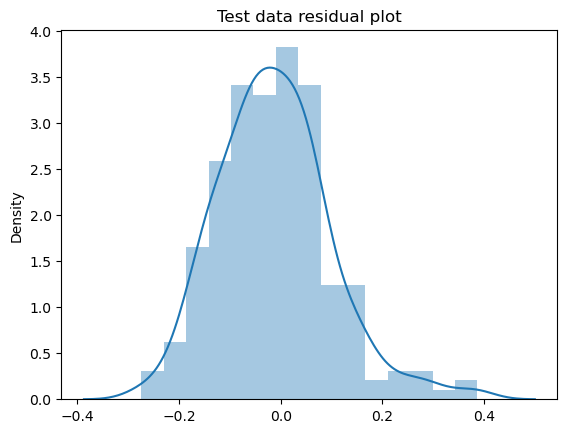

In [81]:
# Plot residual data
sns.distplot(y_pred-y_test)
plt.title('Test data residual plot')
plt.show()

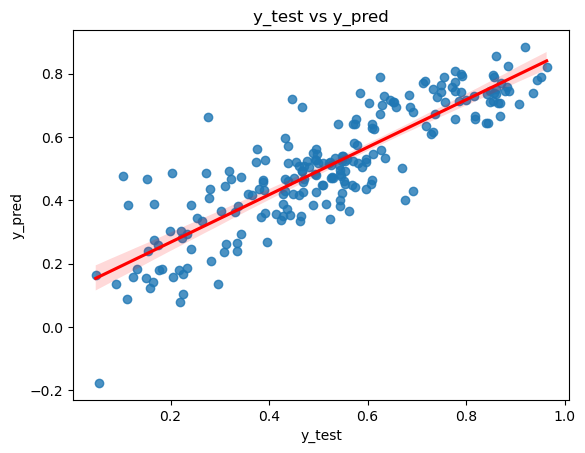

In [82]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()

In [83]:
# R2score for test model
r2_score(y_true=y_test, y_pred=y_pred)

0.7417351441317016

In [84]:
# R2 Score for training model
r2_score(y_true=y_train, y_pred=y_train_pred)

0.7791032979320818

## Final model

- We can describe final model as-

 **cnt** `= 0.275 + 0.248 * yr + 0.56 * workingday - 0.189 * windspeed - 0.087 * Pleasant - 0.302 * Light + 0.219 * summer + 0.258 * fall + 0.184 * winter - 0.103 * jan + 0.072 * sep + 0.065 * sat `

**`R2 Score on test model = 0.7417`**

*R2 Score on the training model  = 0.7791*